In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('data/recruitment_data.csv')
print(df)

      Age  Gender  EducationLevel  ExperienceYears  PreviousCompanies  \
0      26       1               2                0                  3   
1      39       1               4               12                  3   
2      48       0               2                3                  2   
3      34       1               2                5                  2   
4      30       0               1                6                  1   
...   ...     ...             ...              ...                ...   
1495   48       0               2                3                  4   
1496   27       1               2               10                  3   
1497   24       1               1                1                  2   
1498   48       0               2                4                  4   
1499   34       1               2               11                  5   

      DistanceFromCompany  InterviewScore  SkillScore  PersonalityScore  \
0               26.783828              48       

In [3]:
df.head()

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
0,26,1,2,0,3,26.783828,48,78,91,1,1
1,39,1,4,12,3,25.862694,35,68,80,2,1
2,48,0,2,3,2,9.920805,20,67,13,2,0
3,34,1,2,5,2,6.407751,36,27,70,3,0
4,30,0,1,6,1,43.105343,23,52,85,2,0


In [4]:
def dataset_info(df):
    print("Dataset Information:")
    print(df.info())
    print("\nFirst 5 Rows:")
    print(df.head())
    print("\nSummary Statistics:")
    print(df.describe())
    print("\nMissing Values:")
    print(df.isnull().sum())

dataset_info(df)

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1500 non-null   int64  
 1   Gender               1500 non-null   int64  
 2   EducationLevel       1500 non-null   int64  
 3   ExperienceYears      1500 non-null   int64  
 4   PreviousCompanies    1500 non-null   int64  
 5   DistanceFromCompany  1500 non-null   float64
 6   InterviewScore       1500 non-null   int64  
 7   SkillScore           1500 non-null   int64  
 8   PersonalityScore     1500 non-null   int64  
 9   RecruitmentStrategy  1500 non-null   int64  
 10  HiringDecision       1500 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 129.0 KB
None

First 5 Rows:
   Age  Gender  EducationLevel  ExperienceYears  PreviousCompanies  \
0   26       1               2                0                  3   
1   39   

In [5]:
categorical_columns = ['Gender', 'EducationLevel', 'RecruitmentStrategy', 'HiringDecision']
for col in categorical_columns:
    print(f"\nUnique values in {col}:")
    print(df[col].value_counts())

# Correlation matrix
print("\nCorrelation Matrix:")
print(df.corr())


Unique values in Gender:
Gender
0    762
1    738
Name: count, dtype: int64

Unique values in EducationLevel:
EducationLevel
2    740
3    317
1    307
4    136
Name: count, dtype: int64

Unique values in RecruitmentStrategy:
RecruitmentStrategy
2    770
1    445
3    285
Name: count, dtype: int64

Unique values in HiringDecision:
HiringDecision
0    1035
1     465
Name: count, dtype: int64

Correlation Matrix:
                          Age    Gender  EducationLevel  ExperienceYears  \
Age                  1.000000  0.011286        0.032610         0.024780   
Gender               0.011286  1.000000        0.009676        -0.028502   
EducationLevel       0.032610  0.009676        1.000000        -0.000951   
ExperienceYears      0.024780 -0.028502       -0.000951         1.000000   
PreviousCompanies   -0.032580 -0.061915        0.007367         0.015784   
DistanceFromCompany -0.021031  0.003822        0.020600         0.007920   
InterviewScore      -0.025579 -0.020887        0.012

The dataset is well-balanced for gender but shows class imbalance in the target variable, with 31% of candidates hired overall.

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns


Correlation Matrix:
                          Age    Gender  EducationLevel  ExperienceYears  \
Age                  1.000000  0.011286        0.032610         0.024780   
Gender               0.011286  1.000000        0.009676        -0.028502   
EducationLevel       0.032610  0.009676        1.000000        -0.000951   
ExperienceYears      0.024780 -0.028502       -0.000951         1.000000   
PreviousCompanies   -0.032580 -0.061915        0.007367         0.015784   
DistanceFromCompany -0.021031  0.003822        0.020600         0.007920   
InterviewScore      -0.025579 -0.020887        0.012807        -0.051701   
SkillScore          -0.008068  0.012333       -0.043367         0.006323   
PersonalityScore     0.037727  0.023729        0.031115         0.013891   
RecruitmentStrategy  0.018064 -0.023753       -0.036923         0.029603   
HiringDecision       0.001850 -0.002249        0.236710         0.122494   

                     PreviousCompanies  DistanceFromCompany  Inter

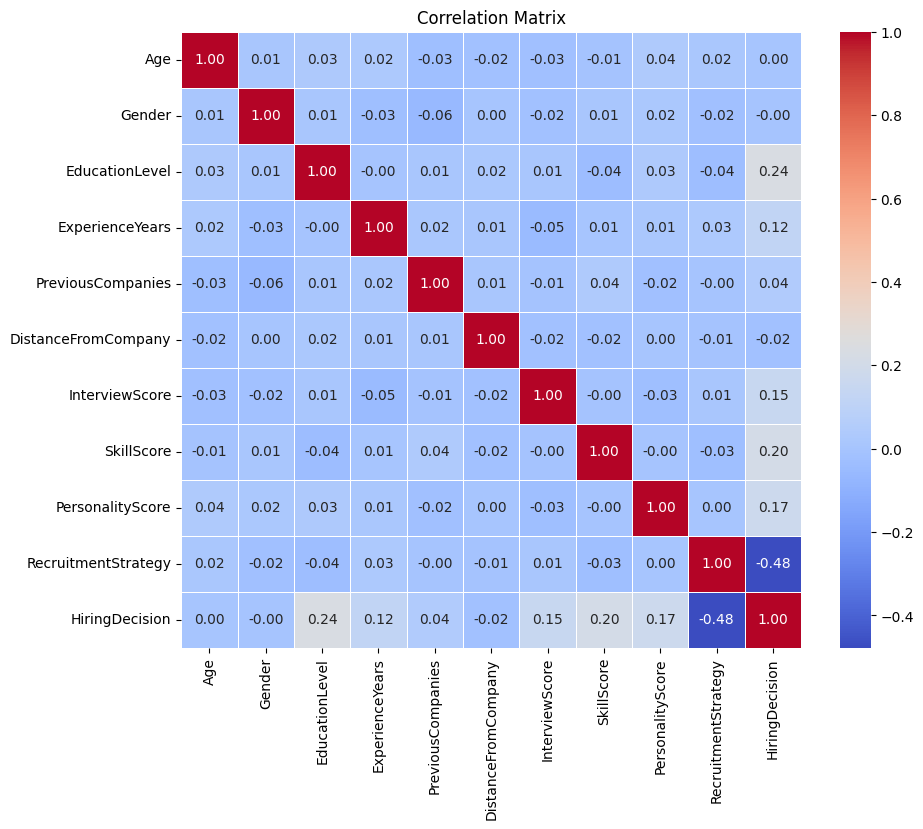

In [7]:
print("\nCorrelation Matrix:")
correlation_matrix = df.corr()
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

## Correlation Analysis Insights

The correlation matrix reveals several important relationships:

- **RecruitmentStrategy** has the strongest correlation with hiring decisions (-0.48), indicating that conservative strategies (higher values) result in fewer hires
- **EducationLevel** shows a moderate positive correlation (0.24) with hiring, suggesting higher education increases hiring probability
- **SkillScore** (0.20) and **PersonalityScore** (0.17) both positively impact hiring decisions
- **ExperienceYears** has a weaker but still positive impact (0.12)
- **Age** and **Gender** show negligible correlations with hiring outcomes, suggesting minimal direct age or gender bias in the data

These relationships provide initial insights, but the true importance and non-linear interactions will be better revealed through our model and SHAP analysis.

/tmp/ipykernel_51883/272898197.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hiring_percentage.index, y=hiring_percentage.values, palette="viridis")


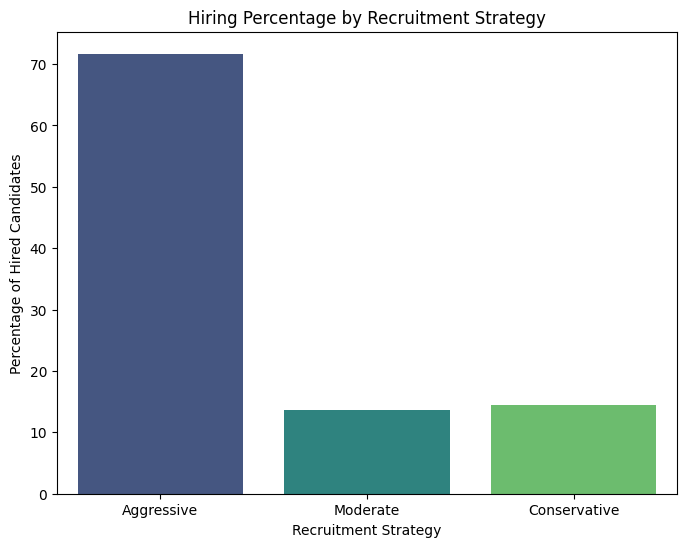

In [8]:
hiring_percentage = df.groupby('RecruitmentStrategy')['HiringDecision'].mean() * 100

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=hiring_percentage.index, y=hiring_percentage.values, palette="viridis")
plt.xlabel("Recruitment Strategy")
plt.ylabel("Percentage of Hired Candidates")
plt.title("Hiring Percentage by Recruitment Strategy")
plt.xticks(ticks=[0, 1, 2], labels=["Aggressive", "Moderate", "Conservative"])
plt.show()


## Recruitment Strategy Analysis

The bar chart clearly demonstrates how different recruitment strategies affect hiring rates. The aggressive strategy (1) yields significantly higher hiring rates compared to moderate (2) and conservative (3) approaches. This makes sense as:

- **Aggressive recruitment**: Prioritizes quick hiring, potentially with less stringent requirements
- **Moderate recruitment**: Balances speed and selectivity
- **Conservative recruitment**: Emphasizes selectivity with more rigorous evaluation criteria

This variable's strong negative correlation with hiring decisions (-0.48) is visually confirmed here and will be important to consider when interpreting the model's predictions.

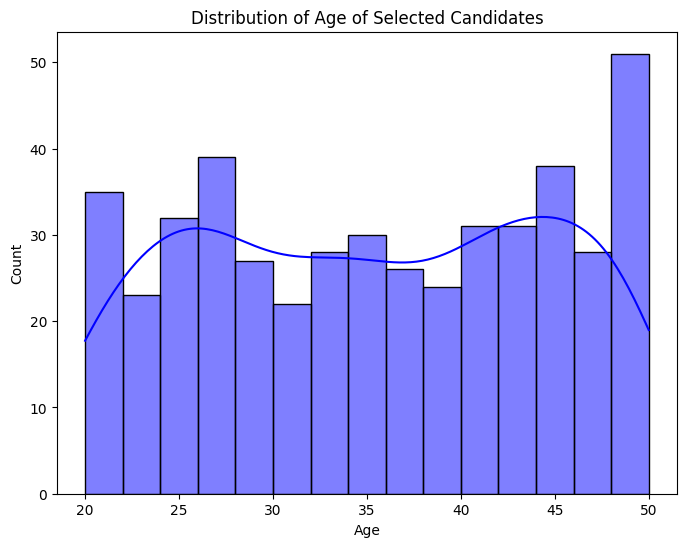

In [9]:
selected_candidates = df[df['HiringDecision'] == 1]
plt.figure(figsize=(8, 6))
sns.histplot(selected_candidates['Age'], bins=15, kde=True, color='blue')
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Distribution of Age of Selected Candidates")
plt.show()


/tmp/ipykernel_51883/128538502.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=selected_candidates['Gender'], palette="pastel")


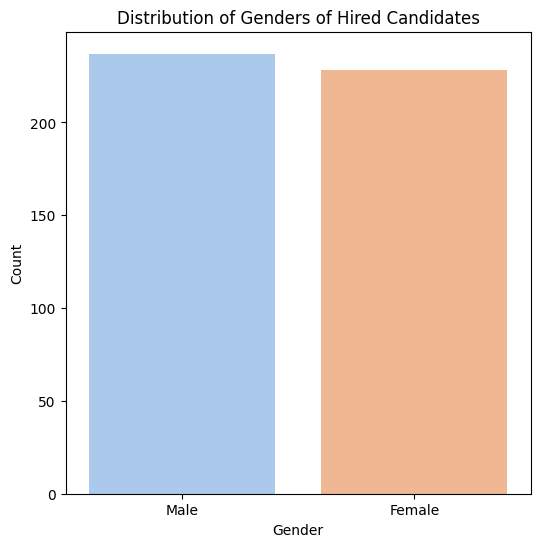

In [10]:
plt.figure(figsize=(6, 6))
sns.countplot(x=selected_candidates['Gender'], palette="pastel")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Distribution of Genders of Hired Candidates")
plt.xticks(ticks=[0, 1], labels=["Male", "Female"])
plt.show()


/tmp/ipykernel_51883/2870080377.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=selected_candidates['EducationLevel'], palette="muted")


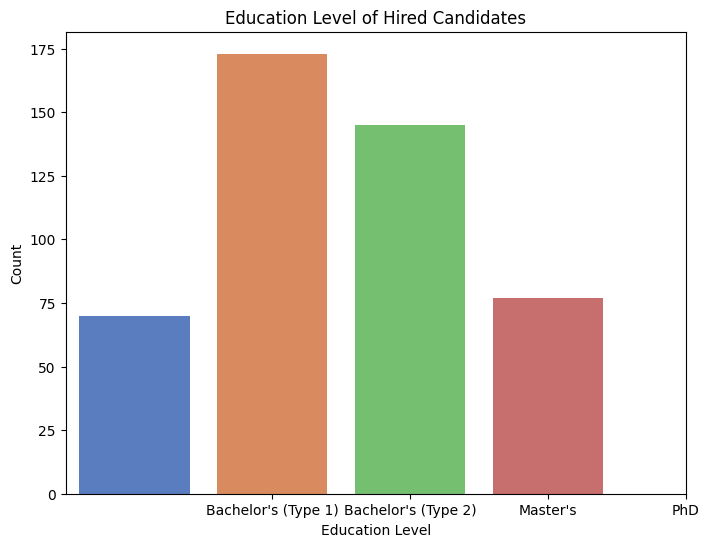

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(x=selected_candidates['EducationLevel'], palette="muted")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.title("Education Level of Hired Candidates")
plt.xticks(ticks=[1, 2, 3, 4], labels=["Bachelor's (Type 1)", "Bachelor's (Type 2)", "Master's", "PhD"])
plt.show()

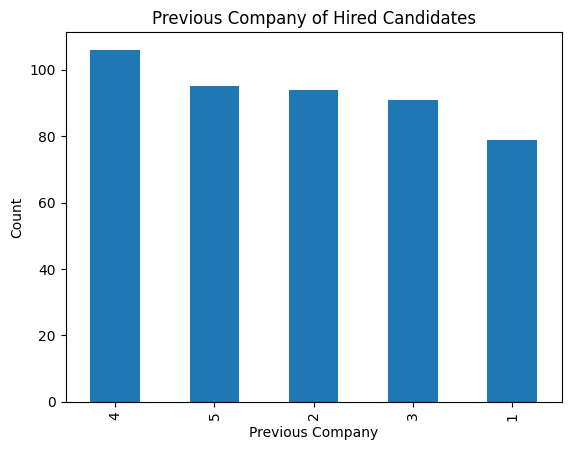

In [12]:
hired_df = df[df['HiringDecision'] == 1]
hired_df['PreviousCompanies'].value_counts().plot(kind='bar')
plt.xlabel('Previous Company')
plt.ylabel('Count')
plt.title('Previous Company of Hired Candidates')
plt.show()

/tmp/ipykernel_51883/1971839962.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(selected_candidates['InterviewScore'], label='Interview Score', shade=True)
/tmp/ipykernel_51883/1971839962.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(selected_candidates['SkillScore'], label='Skill Score', shade=True)
/tmp/ipykernel_51883/1971839962.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(selected_candidates['PersonalityScore'], label='Personality Score', shade=True)


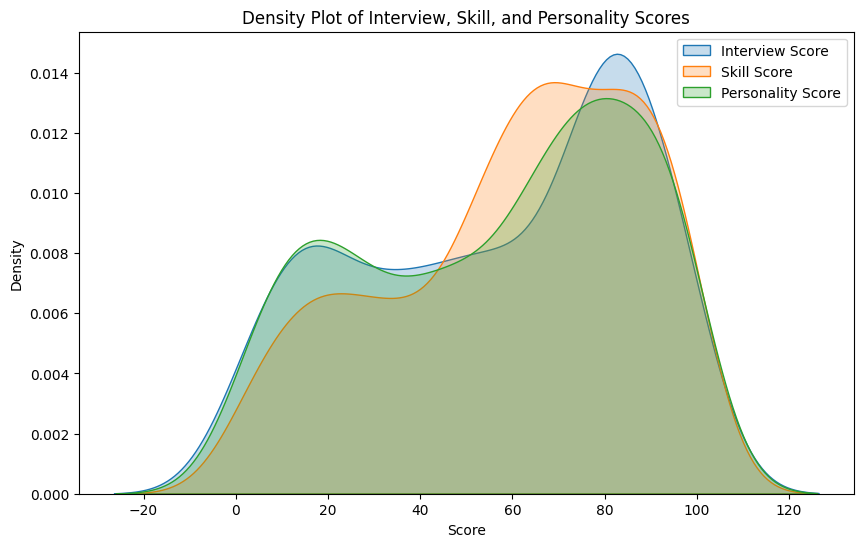

In [13]:
plt.figure(figsize=(10, 6))
sns.kdeplot(selected_candidates['InterviewScore'], label='Interview Score', shade=True)
sns.kdeplot(selected_candidates['SkillScore'], label='Skill Score', shade=True)
sns.kdeplot(selected_candidates['PersonalityScore'], label='Personality Score', shade=True)
plt.xlabel("Score")
plt.ylabel("Density")
plt.title("Density Plot of Interview, Skill, and Personality Scores")
plt.legend()
plt.show()

# Training model

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_auc_score
from sklearn.preprocessing import StandardScaler

In [15]:
from catboost import CatBoostClassifier

In [16]:
X = df.drop('HiringDecision', axis=1)
y = df['HiringDecision']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

catboost_classifier = CatBoostClassifier(iterations=100, verbose=0)
catboost_classifier.fit(X_train, y_train)

def predict_function(X):
    return catboost_classifier.predict(X)

def predict_proba_function(X):
    return catboost_classifier.predict_proba(X)

y_pred = predict_function(X_test)
y_pred_proba = predict_proba_function(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
roc_auc_prob = roc_auc_score(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred)

print("Accuracy:\n", accuracy, "\n")
print("ROC AUC Score:\n", roc_auc, "\n")
print("ROC AUC Score for predict_proba:\n", roc_auc_prob, "\n")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred), "\n")
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy:
 0.9566666666666667 

ROC AUC Score:
 0.941313269493844 

ROC AUC Score for predict_proba:
 0.9291381668946648 

Confusion Matrix:
 [[210   5]
 [  8  77]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       215
           1       0.94      0.91      0.92        85

    accuracy                           0.96       300
   macro avg       0.95      0.94      0.95       300
weighted avg       0.96      0.96      0.96       300



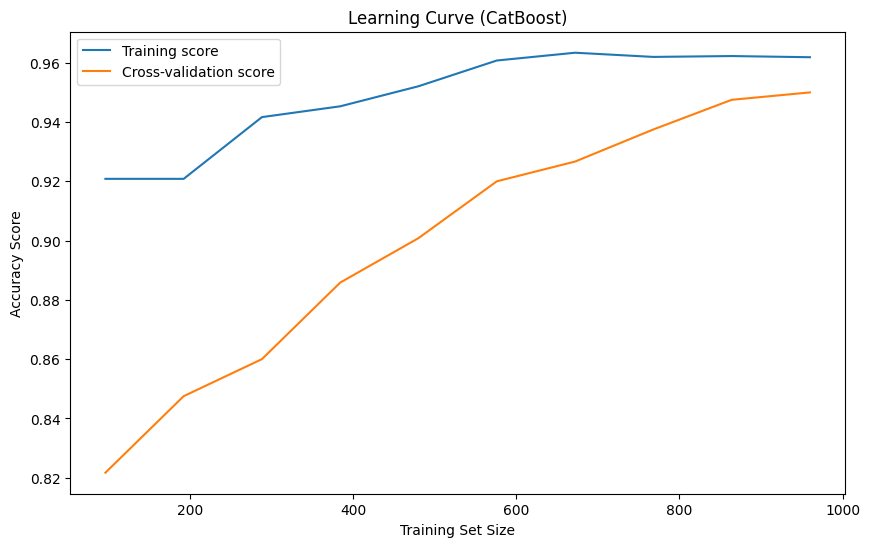

In [17]:
from sklearn.model_selection import learning_curve

train_sizes_catboost, train_scores_catboost, valid_scores_catboost = learning_curve(
    catboost_classifier, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5, scoring='accuracy'
)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes_catboost, np.mean(train_scores_catboost, axis=1), label='Training score')
plt.plot(train_sizes_catboost, np.mean(valid_scores_catboost, axis=1), label='Cross-validation score')
plt.title('Learning Curve (CatBoost)')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

## Explainable AI Approach

While our CatBoost model achieves good predictive performance, it's essential to understand how it makes decisions, especially in HR contexts where fairness and transparency are critical. We'll use SHAP (SHapley Additive exPlanations) to:

1. **Identify key influencing features** in hiring decisions
2. **Quantify each feature's impact** on individual predictions
3. **Detect potential biases** in the decision process
4. **Understand feature interactions** that affect outcomes

SHAP values provide a theoretically sound method based on cooperative game theory to fairly distribute the "contribution" of each feature to each prediction.

In [18]:
from src.shap import KernelExplainer, SamplingExplainer
from src.plot_shap import ShapPlotter

# Feature importance of SHAP Explainer based on sampling approximation
The SamplingExplainer approximates SHAP values by sampling from the training data, offering a good balance between accuracy and computational efficiency.


The SHAP plots:

- **Beeswarm plot**: A SHAP beeswarm plot visualizes the distribution and impact of each feature's SHAP values across all predictions, showing feature importance (vertical order) and effect direction (red/blue for positive/negative influence). It helps identify key drivers of model behavior while revealing nonlinear patterns and outliers in feature contributions.
- **Bar plot (Global)**: The SHAP bar plot ranks features by their average impact (mean absolute SHAP values), showing which features most influence the model's predictions across all data.
- **Bar plot (Local)**: For a single prediction, it displays each feature's exact contribution (positive/negative SHAP value), explaining how they pushed the prediction higher or lower than the baseline.
- **Dependence plot**: The dependence plot shows how the impact of feature varies across different values, revealing non-linear relationships not captured by simple correlation
- **Waterfall plot**: The waterfall plot for a specific candidate shows how each feature contributed to their final prediction, providing transparency for individual decisions


Calculating SHAP values: 100%|██████████| 300/300 [00:17<00:00, 16.88it/s]


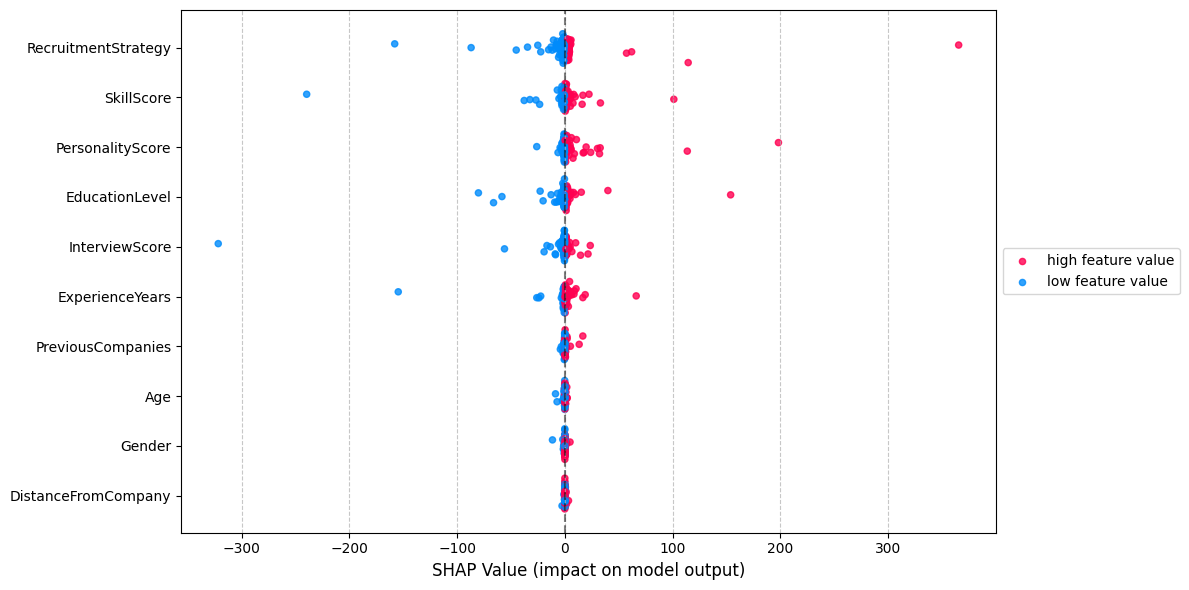

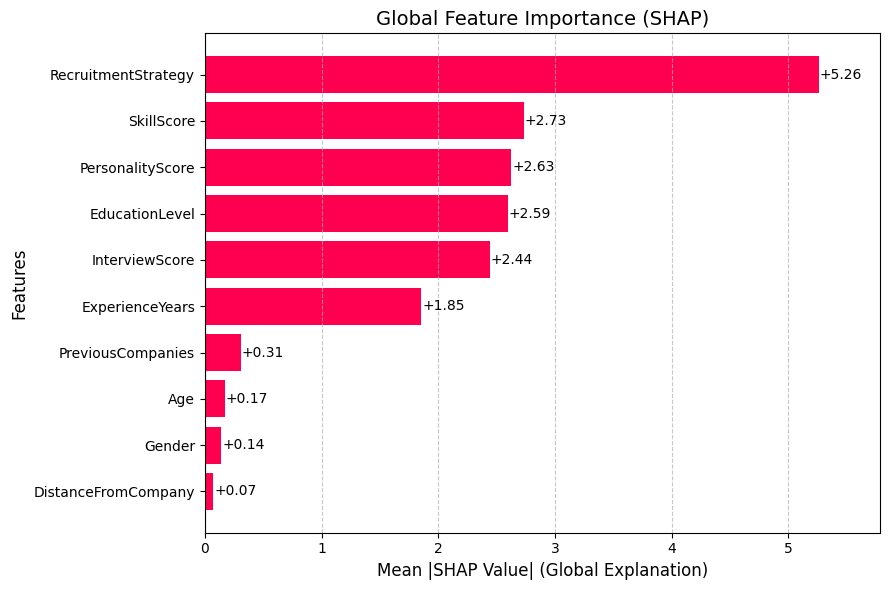

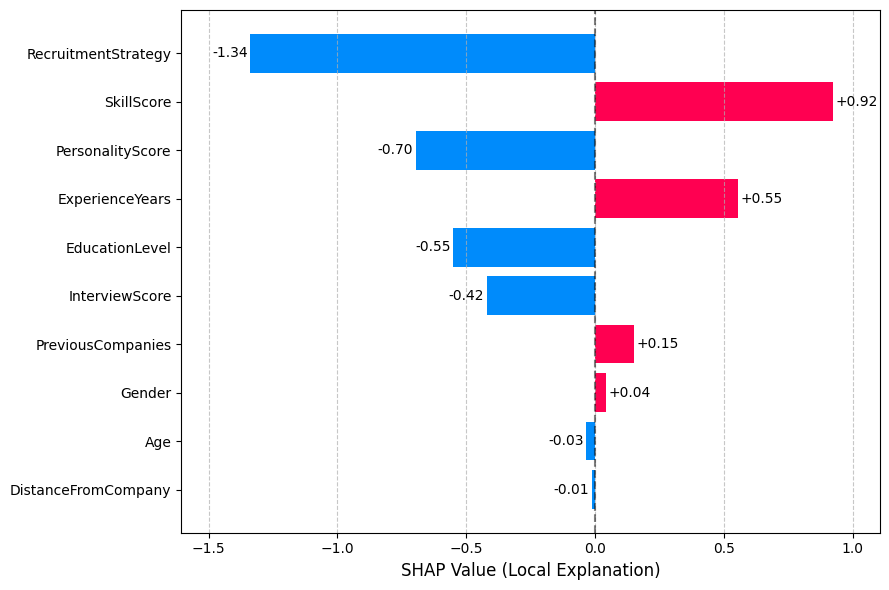

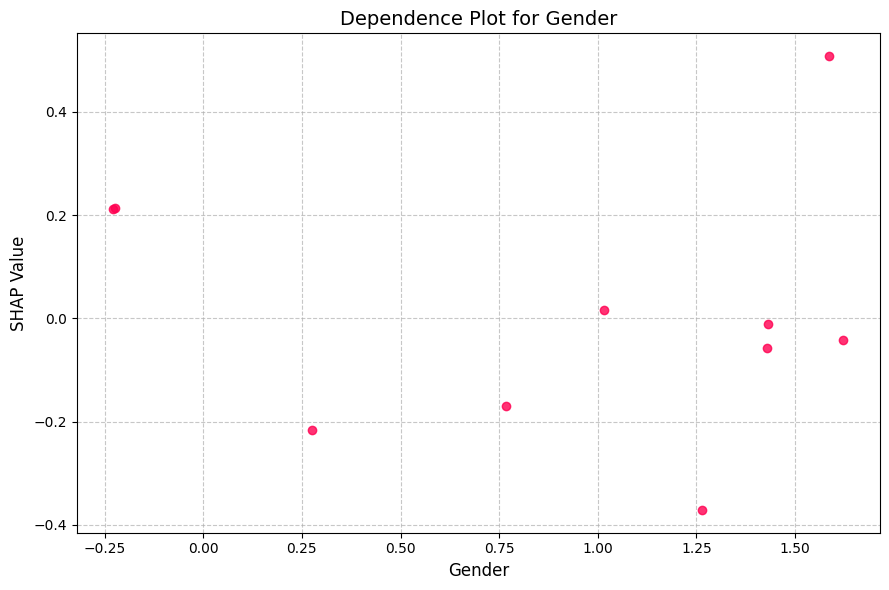

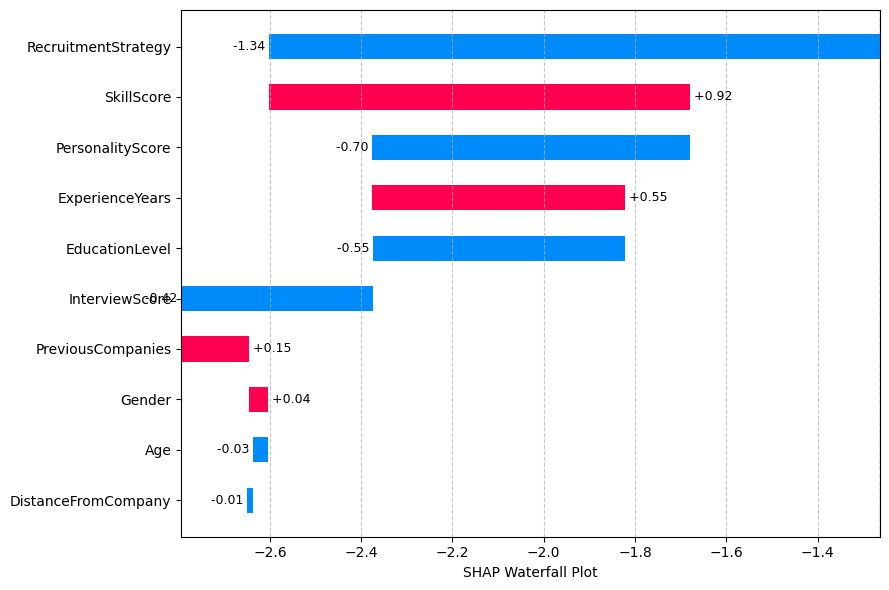

In [19]:
custom_sampling_explainer = SamplingExplainer(predict_proba_function, X_train)
custom_sampling_shap_values = custom_sampling_explainer.shap_values(X_test, max_samples=len(X_train))

sampling_values = custom_sampling_shap_values
sampling_expected_value = custom_sampling_explainer.expected_value
sampling_data = X_test
sampling_feature_names = X.columns

plotter = ShapPlotter()

plotter.beeswarm(sampling_values, sampling_feature_names)
plotter.bar(sampling_values, sampling_feature_names)
plotter.bar(sampling_values[0], sampling_feature_names)
plotter.dependence(sampling_values[1, :], sampling_data[1, :], sampling_feature_names[1])
plotter.waterfall(sampling_values[0, :], sampling_feature_names, sampling_expected_value)


# Feature importance of Kernel SHAP Explainer

The Kernel explainer provides model-agnostic SHAP values using a weighted linear regression:

This approach makes fewer assumptions but is computationally more intensive

Also it has randomness factor of how the linear regression will be fitted

Calculating SHAP values: 100%|██████████| 300/300 [00:24<00:00, 12.30instance/s]


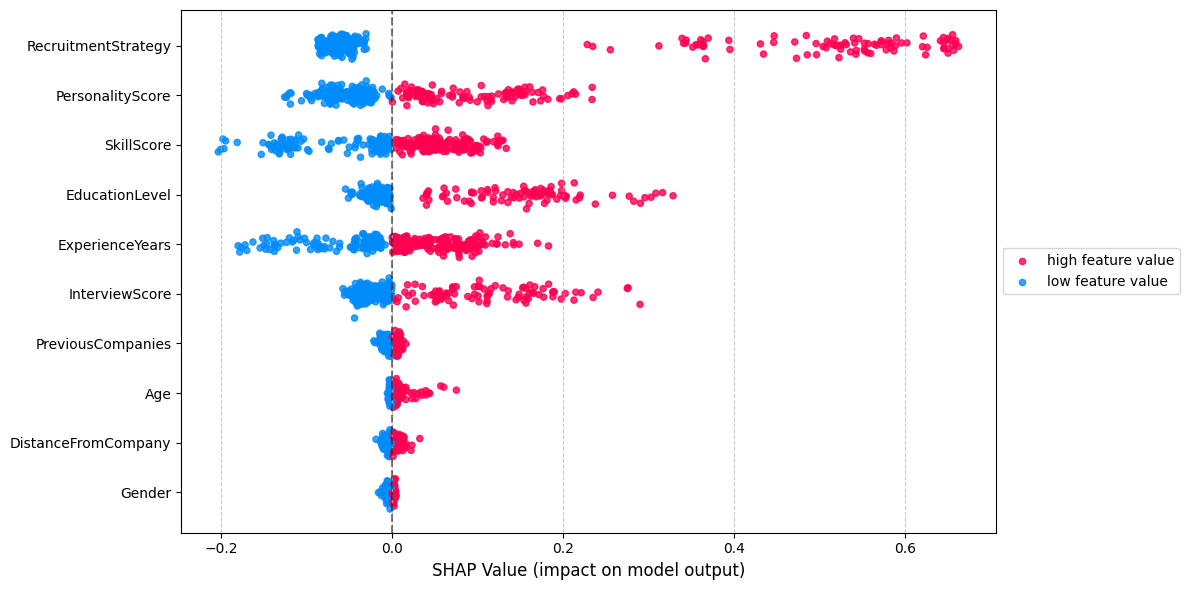

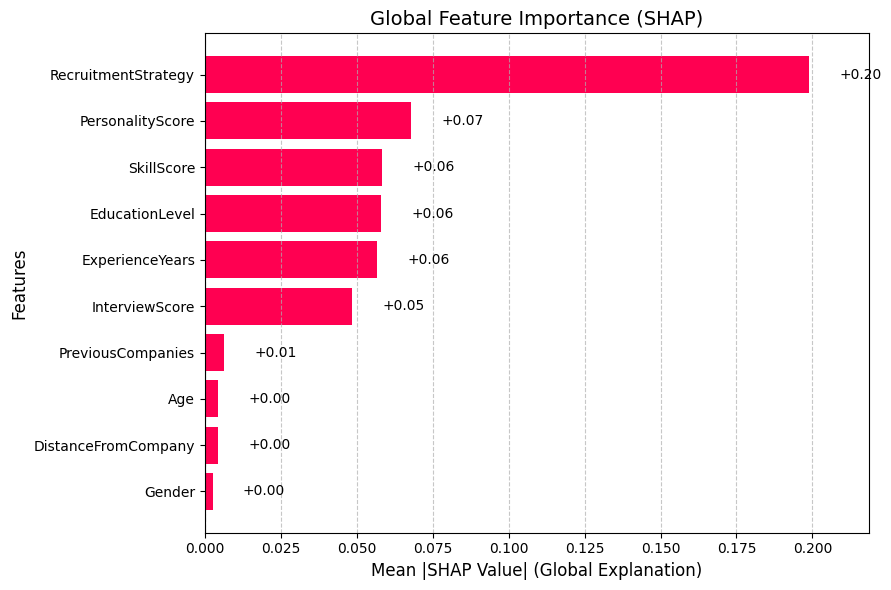

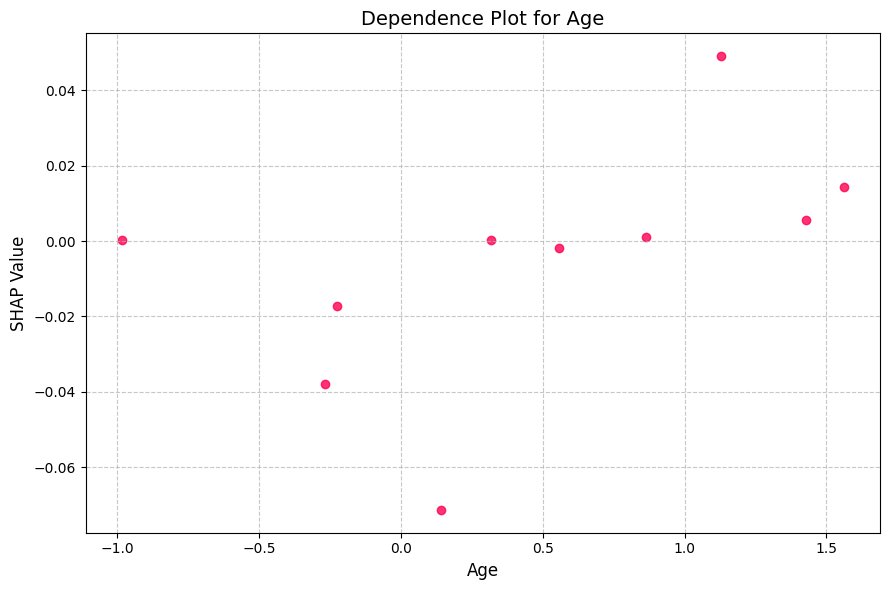

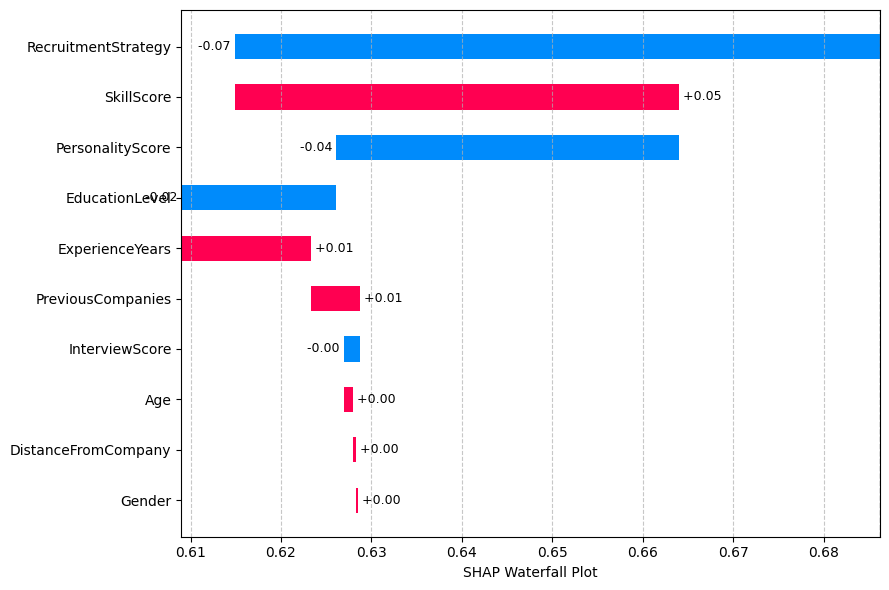

In [20]:
custom_kernel_explainer = KernelExplainer(predict_proba_function, X_train, max_samples=len(X_train), random_state=42)
custom_kernel_shap_values = custom_kernel_explainer.shap_values(X_test)[1]

kernel_values = custom_kernel_shap_values
kernel_expected_value = custom_kernel_explainer.expected_value
kernel_data = X_test
kernel_feature_names = X.columns

plotter = ShapPlotter()

plotter.beeswarm(kernel_values, kernel_feature_names)
plotter.bar(kernel_values, kernel_feature_names)
plotter.dependence(kernel_values[0, :], kernel_data[0, :], kernel_feature_names[0])
plotter.waterfall(kernel_values[0, :], kernel_feature_names, kernel_expected_value[0])


# Feature importance given by CatBoost

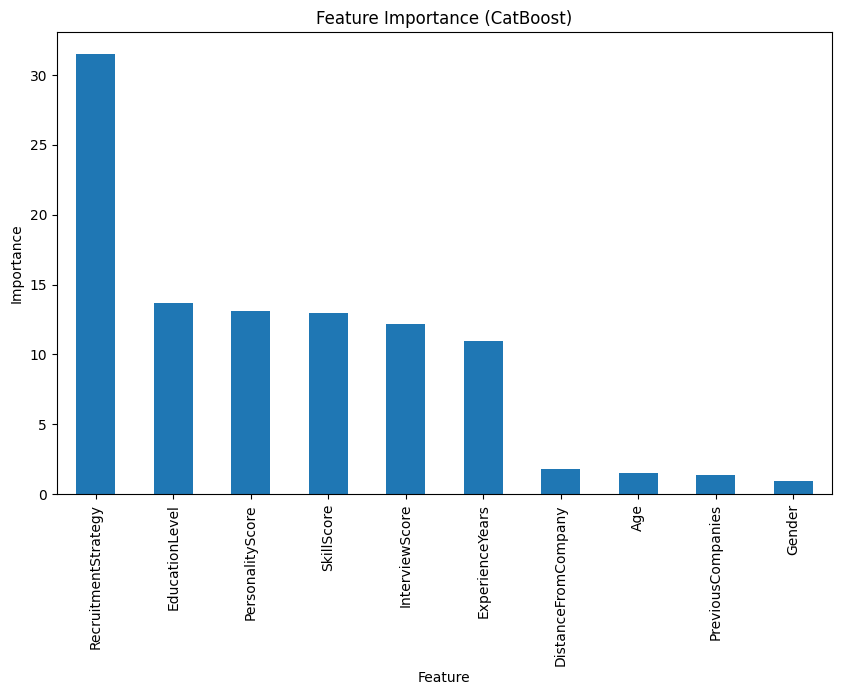

In [21]:
feature_importance_catboost = pd.Series(catboost_classifier.feature_importances_, index=X.columns)
feature_importance_catboost.sort_values(ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
feature_importance_catboost.plot(kind='bar')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance (CatBoost)')
plt.show()

## Comparing Interpretability Methods

Comparing the native CatBoost feature importance with 2 SHAP Explainers (Kernel and Sampling):

1. **Agreement on top features**: All three methods showed similar top influenced features, having RecruitmentStrategy as most influenced. We can also see those features in correlation matrix.
2. **Different perspectives**: 
   - CatBoost feature importance shows average magnitude of feature impact across the dataset
   - SHAP values provide detailed feature contributions for each prediction, showing both magnitude and direction

3. **Practical implications**:
   - For recruiters, this analysis suggests focusing evaluation on education credentials and technical skills
   - The recruitment strategy parameter should be carefully selected based on hiring goals
   - The model shows limited reliance on demographic factors like age and gender, suggesting fairness in this dimension
   - Distance from company has minimal impact, suggesting remote work considerations

These interpretability tools help ensure the hiring model is transparent, fair, and aligned with organizational values and legal requirements.

## Conclusion and Recommendations

Our analysis of the recruitment model reveals several key insights:

1. **Strategic hiring approaches** significantly impact outcomes, with aggressive strategies yielding higher hiring rates
2. **Educational qualifications** and **technical skills** are the strongest candidate-specific predictors of success
3. **The model shows minimal direct bias** based on demographic factors like age and gender
4. **Explainable AI techniques** provide transparency that's critical for HR applications

### Recommendations:

1. **Adjust recruitment strategy** based on current talent needs and market conditions
2. **Focus candidate evaluation** on the most predictive factors (education and skills)
3. **Regularly audit the model** using SHAP values to ensure decisions remain fair and unbiased
4. **Consider interpretability** when deploying ML models in sensitive decision contexts like hiring

This explainable AI approach allows us to leverage machine learning for hiring while maintaining transparency and fairness in the recruitment process.